## Definir importaciones necesarias

In [1]:
import plotly.io as pio
import os
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import correlate, find_peaks
from scipy.fft import fft, fftfreq


In [2]:
plt.style.use('classic')

## Obtención de archivo de audio

> Note que estos archivos son Mono y se debe adaptar a su propio sistema de archivos.

In [6]:
base_path = "./ECG/"

audio_files_path = list(
    filter(
        lambda x : x.endswith(".wav"),
        os.listdir(base_path)
    )
)

print(f"Count of audio files: {len(audio_files_path)}")

Count of audio files: 563


Audio file analyzed: ./ECG/71471-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/63765-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/67566-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/70504-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/67638-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/63052-1K-raw.wav
Sample rate: 1000


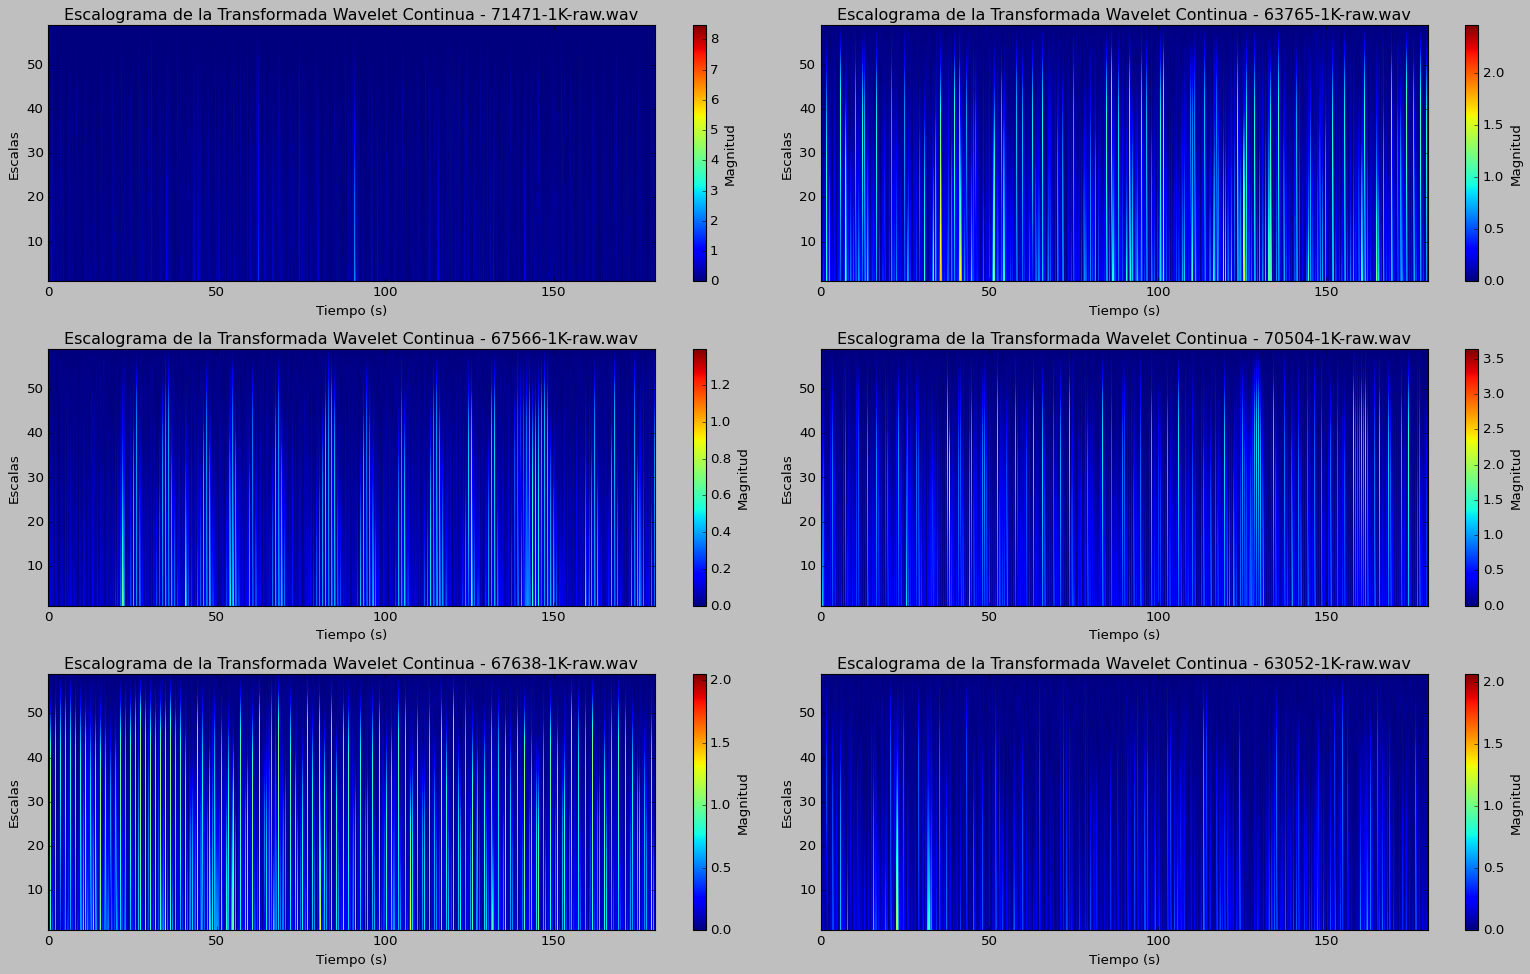

In [7]:
audios                  = []
audios_frequencies      = []
audios_coefficients     = []

# Parámetros de la CWT
wavelet = 'cgau1'  # Se puede cambiar por otra wavelet, como 'cmor' o 'gaus'
scales = np.arange(1, 60)  # Rango de escalas para la CWT

start = 0
final = 6

figure = plt.figure(
    figsize=(20, 20)
)

for idx, audio_file_path in enumerate(audio_files_path[start:final]):

    audio_file_example = base_path + audio_file_path
    print(f"Audio file analyzed: {audio_file_example}")

    sample_rate, audio_data = wav.read(audio_file_example)
    audio_data = audio_data / np.max(np.abs(audio_data))

    print(f"Sample rate: {sample_rate}")
    audios.append(audio_data)
    
    # Aplicar CWT a la señal de ECG
    coefficients, frequencies = pywt.cwt(
        audio_data, 
        scales, 
        wavelet, 
        1 / sample_rate
    )

    audios_frequencies.append(frequencies)
    audios_coefficients.append(coefficients)

    # Graficar la CWT
    plt.subplot(5, 2, idx + 1)
    plt.imshow(
        np.abs(coefficients), 
        extent=[
            0, 
            len(audio_data)/sample_rate,  
            1, 
            max(scales)
        ],  
        cmap='jet',
        aspect='auto',
        vmax=np.max(np.abs(coefficients)), 
        vmin=0
    )

    plt.colorbar(label='Magnitud')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Escalas')

    plt.title(f'Escalograma de la Transformada Wavelet Continua - {audio_file_path}')
    plt.tight_layout()

plt.show()


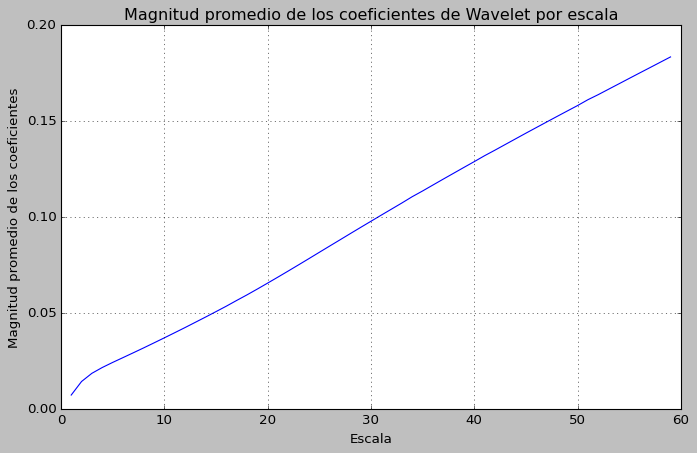

In [8]:
average_coefficients = np.mean(np.abs(coefficients), axis=1)

plt.figure(figsize=(10, 6))
plt.plot(scales, average_coefficients)
plt.xlabel('Escala')
plt.ylabel('Magnitud promedio de los coeficientes')
plt.title('Magnitud promedio de los coeficientes de Wavelet por escala')
plt.grid(True)
plt.show()

In [10]:
import plotly.io as pio
import os
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import correlate, find_peaks
from scipy.fft import fft, fftfreq

plt.style.use('classic')

base_path = "./ECG/"

audio_files_path = list(
    filter(
        lambda x : x.endswith(".wav"),
        os.listdir(base_path)
    )
)

print(f"Count of audio files: {len(audio_files_path)}")
audios                  = []
audios_frequencies      = []
audios_coefficients     = []
all_coefficients = [] # Initialize here

# Parámetros de la CWT
wavelet = 'cgau1'  # Se puede cambiar por otra wavelet
scales = np.arange(1, 60)  # Rango de escalas para la CWT

start = 0
final = 6

max_length = 0  # Variable to store the maximum length

for idx, audio_file_path in enumerate(audio_files_path[start:final]):

    audio_file_example = base_path + audio_file_path
    print(f"Audio file analyzed: {audio_file_example}")

    sample_rate, audio_data = wav.read(audio_file_example)
    audio_data = audio_data / np.max(np.abs(audio_data))

    print(f"Sample rate: {sample_rate}")
    audios.append(audio_data)

    max_length = max(max_length, len(audio_data)) # Find the maximum length

for idx, audio_file_path in enumerate(audio_files_path[start:final]): # Second loop to process and pad

    audio_file_example = base_path + audio_file_path
    sample_rate, audio_data = wav.read(audio_file_example)
    audio_data = audio_data / np.max(np.abs(audio_data))

    # **Ensure Consistent Length - Padding**
    current_length = len(audio_data)
    if current_length < max_length:
        padding_length = max_length - current_length
        audio_data = np.pad(audio_data, (0, padding_length), 'constant') # Pad with zeros at the end

    # Aplicar CWT a la señal de ECG
    coefficients, frequencies = pywt.cwt(
        audio_data,
        scales,
        wavelet,
        1 / sample_rate
    )

    print(f"Shape of coefficients for {audio_file_path}: {coefficients.shape}") # Debugging: Print shape
    audios_frequencies.append(frequencies)
    audios_coefficients.append(coefficients)
    all_coefficients.append(coefficients) # Append coefficients

# Calculate the average of the wavelet transform coefficients
average_coefficients = np.mean(np.array(all_coefficients), axis=0)

# ... (rest of the plotting code - unchanged) ...

Count of audio files: 563
Audio file analyzed: ./ECG/71471-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/63765-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/67566-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/70504-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/67638-1K-raw.wav
Sample rate: 1000
Audio file analyzed: ./ECG/63052-1K-raw.wav
Sample rate: 1000
Shape of coefficients for 71471-1K-raw.wav: (59, 180020)
Shape of coefficients for 63765-1K-raw.wav: (59, 180020)
Shape of coefficients for 67566-1K-raw.wav: (59, 180020)
Shape of coefficients for 70504-1K-raw.wav: (59, 180020)
Shape of coefficients for 67638-1K-raw.wav: (59, 180020)
Shape of coefficients for 63052-1K-raw.wav: (59, 180020)


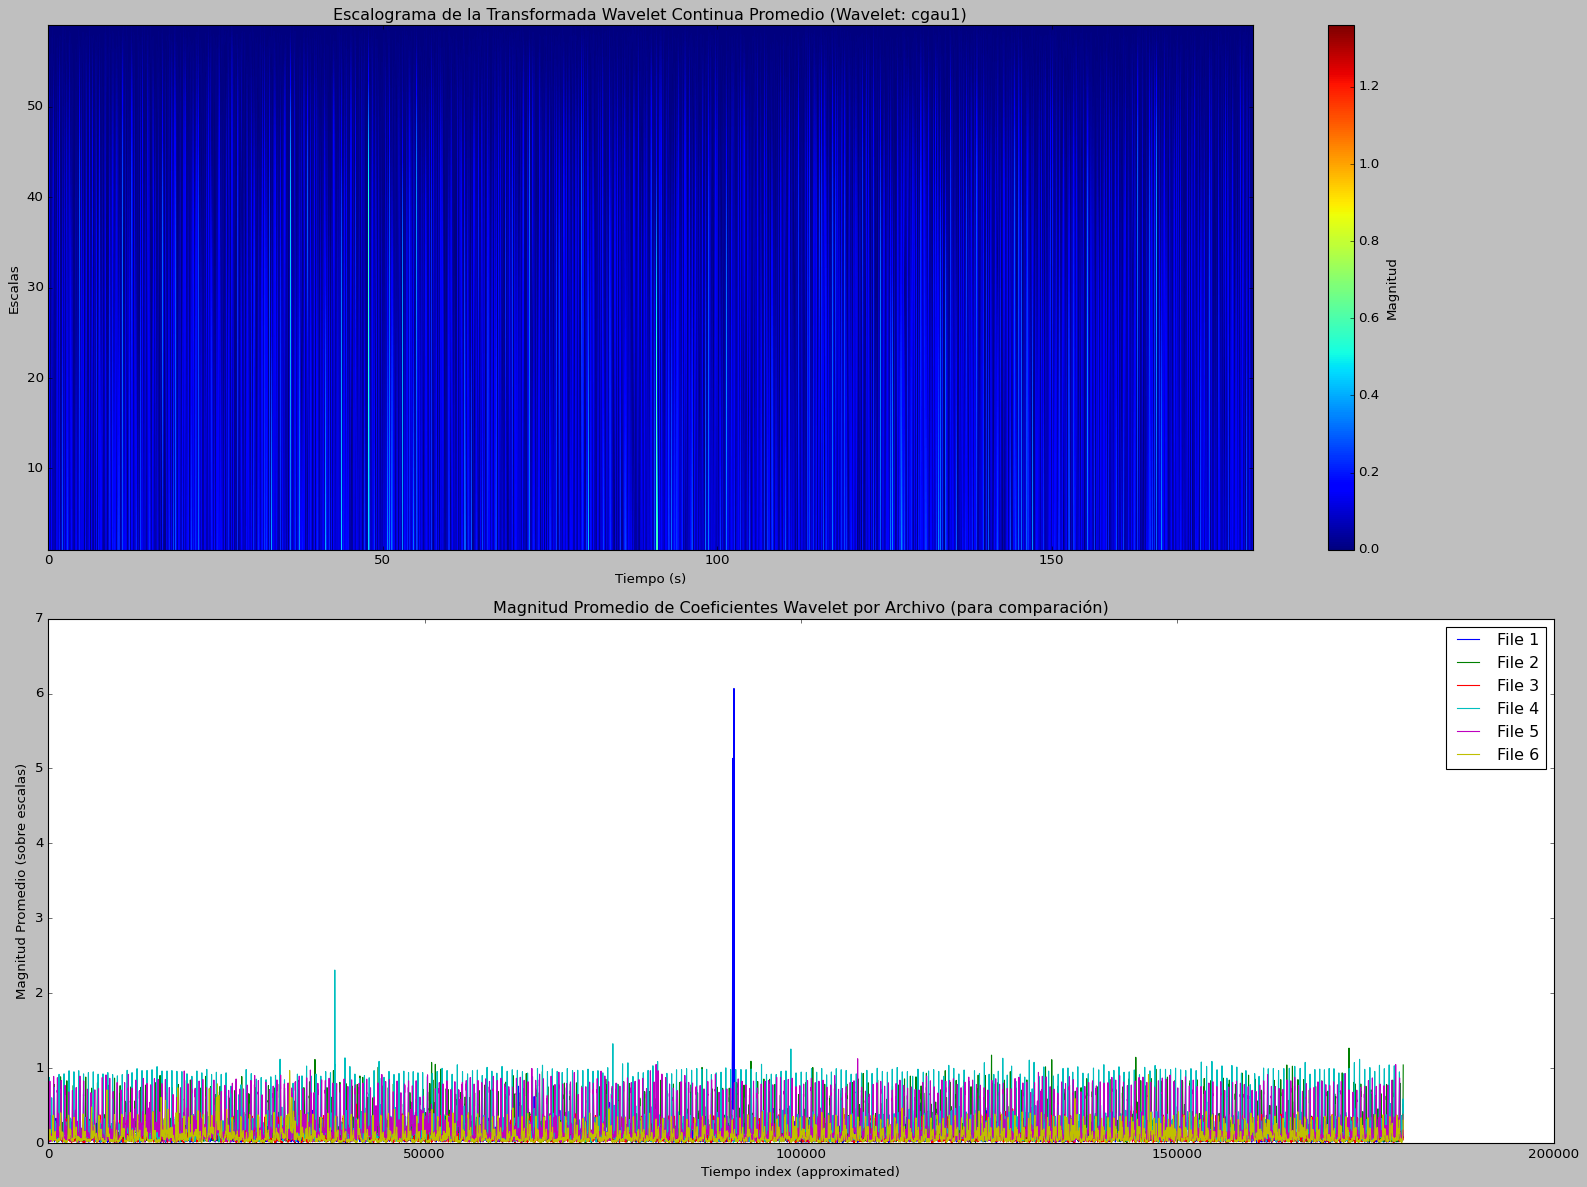

In [11]:

# Plotting the average wavelet transform and individual transforms

figure = plt.figure(figsize=(20, 15)) # Adjust figure size for better layout

# Plotting the average wavelet transform
plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.imshow(
    np.abs(average_coefficients),
    extent=[
        0,
        len(audios[0])/sample_rate if audios else 0, # Using length of the first audio if available, else 0
        1,
        max(scales)
    ],
    cmap='jet',
    aspect='auto',
    vmax=np.max(np.abs(average_coefficients)),
    vmin=0
)

plt.colorbar(label='Magnitud')
plt.xlabel('Tiempo (s)')
plt.ylabel('Escalas')
plt.title(f'Escalograma de la Transformada Wavelet Continua Promedio (Wavelet: {wavelet})')
plt.tight_layout()


# Plotting individual wavelet transforms (optional, for comparison)
plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
for idx, audio_file_path in enumerate(audio_files_path[start:final]):
    plt.plot(np.mean(np.abs(audios_coefficients[idx]), axis=0), label=f'File {idx+1}') # Average magnitude across scales for each file
plt.xlabel('Tiempo index (approximated)') # Time axis is approximate index here after averaging over scales
plt.ylabel('Magnitud Promedio (sobre escalas)')
plt.title('Magnitud Promedio de Coeficientes Wavelet por Archivo (para comparación)')
plt.legend()
plt.tight_layout()


plt.show()

In [8]:
# Definir el rango de escalas que quieres utilizar para el filtro
escala_min = 40  # Escala mínima (ajusta según la frecuencia de interés)
escala_max = 80  # Escala máxima (ajusta según la frecuencia de interés)


for idx, (audio, frequencies, coefficients) in enumerate(
    zip(
        audios,
        audios_frequencies,
        audios_coefficients
    )
):
    '''

    '''




In [9]:
base_path = "./PPG/"

audio_files_path = list(
    filter(
        lambda x : x.endswith(".wav"),
        os.listdir(base_path)
    )
)

print(f"Count of audio files: {len(audio_files_path)}")

Count of audio files: 563


Audio file analyzed: ./PPG/66665-ppg.wav
Sample rate: 1000


/opt/miniconda3/envs/biomedical/lib/python3.11/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


Audio file analyzed: ./PPG/69202-ppg.wav
Sample rate: 1000
Audio file analyzed: ./PPG/13754-ppg.wav
Sample rate: 1000
Audio file analyzed: ./PPG/11771-ppg.wav
Sample rate: 1000
Audio file analyzed: ./PPG/9495-ppg.wav
Sample rate: 1000
Audio file analyzed: ./PPG/12573-ppg.wav
Sample rate: 1000


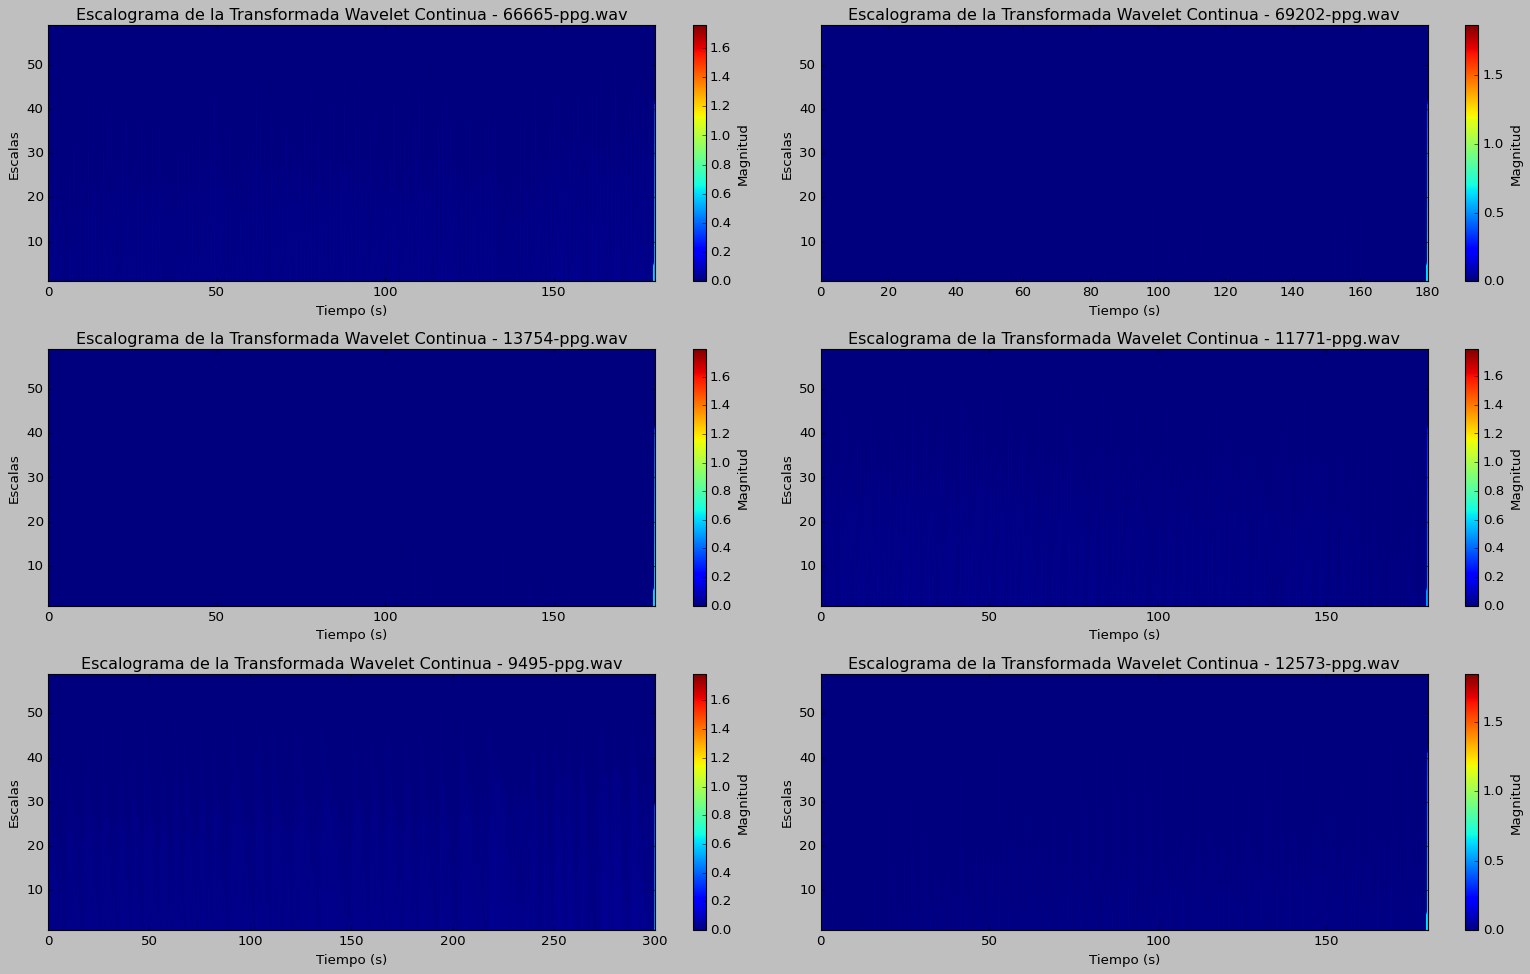

In [10]:
audios                  = []
audios_frequencies      = []
audios_coefficients     = []

# Parámetros de la CWT
wavelet = 'cmor'  # Se puede cambiar por otra wavelet, como 'cmor' o 'gaus'
scales = np.arange(1, 60)  # Rango de escalas para la CWT

start = 0
final = 6

figure = plt.figure(
    figsize=(20, 20)
)

for idx, audio_file_path in enumerate(audio_files_path[start:final]):

    audio_file_example = base_path + audio_file_path
    print(f"Audio file analyzed: {audio_file_example}")

    sample_rate, audio_data = wav.read(audio_file_example)
    audio_data = audio_data / np.max(np.abs(audio_data))

    print(f"Sample rate: {sample_rate}")
    audios.append(audio_data)
    
    # Aplicar CWT a la señal de ECG
    coefficients, frequencies = pywt.cwt(
        audio_data, 
        scales, 
        wavelet, 
        1 / sample_rate
    )

    audios_frequencies.append(frequencies)
    audios_coefficients.append(coefficients)

    # Graficar la CWT
    plt.subplot(5, 2, idx + 1)
    plt.imshow(
        np.abs(coefficients), 
        extent=[
            0, 
            len(audio_data)/sample_rate,  
            1, 
            max(scales)
        ],  
        cmap='jet',
        aspect='auto',
        vmax=np.max(np.abs(coefficients)), 
        vmin=0
    )

    plt.colorbar(label='Magnitud')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Escalas')

    plt.title(f'Escalograma de la Transformada Wavelet Continua - {audio_file_path}')
    plt.tight_layout()

plt.show()


/opt/miniconda3/envs/biomedical/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


ValueError: x and y must have same first dimension, but have shapes (180020,) and (180008,)

<Figure size 1600x1600 with 0 Axes>

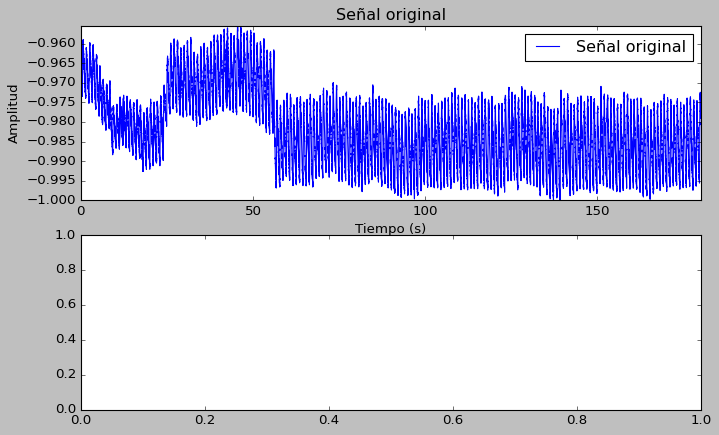

In [ ]:
# Definir el rango de escalas que quieres utilizar para el filtro
escala_min = 40  # Escala mínima (ajusta según la frecuencia de interés)
escala_max = 80  # Escala máxima (ajusta según la frecuencia de interés)

figure = plt.figure(
    figsize=(20, 20)
)

for idx, (audio, frequencies, coefficients) in enumerate(
    zip(
        audios,
        audios_frequencies,
        audios_coefficients
    )
):
    '''

    '''
    filtered_signal = np.sum(coefficients[escala_min:escala_max, :], axis=0)
    times = np.arange(0, len(audio_data) / sample_rate, 1 / sample_rate)  # Tiempos de muestreo

    
    small_figure = plt.figure(
        figsize=(10, 6)
    )

    small_figure.add_subplot(2, 1, 1)
    plt.plot(times, audio_data, label='Señal original')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title('Señal original')
    plt.legend()
    plt.xlim([0, len(audio_data) / sample_rate])
    plt.ylim([min(audio_data), max(audio_data)])


    small_figure.add_subplot(2, 1, 2)
    plt.plot(times, filtered_signal, label='Señal filtrada')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title('Señal filtrada')
    plt.legend()
    plt.xlim([0, len(audio_data) / sample_rate])
    plt.ylim([min(filtered_signal), max(filtered_signal)])

    plt.tight_layout()
    plt.show()


    # Calcular la transformada de Fourier de la señal filtrada
    
    

plt.show()
    



